# Unsupervised Learning

### Introduction

In this notebook, we'll explore the differences between K-Means and DBSCAN clustering algorithms using the Circles dataset generated with the make_circles function from the sklearn.datasets module. The Circles dataset consists of two concentric circles, making it suitable for testing clustering algorithms' ability to handle non-linearly separable data.


In [11]:

# Importing libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_circles
import seaborn as sns

# Generating the Circles dataset.
circles, _ = make_circles(n_samples=1000, factor=0.5, noise=0.05, random_state=42)

### Data Visualization
Let's visualize the Circles dataset to understand its structure and distribution.

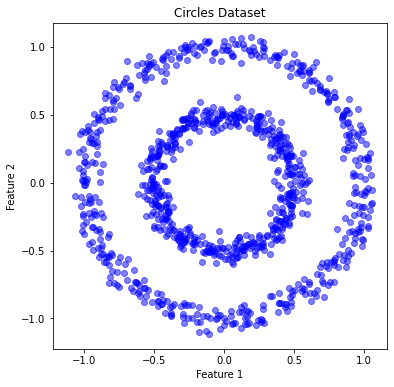

In [12]:
# Plotting the Circles dataset.
plt.figure(figsize=(6, 6))
plt.scatter(circles[:, 0], circles[:, 1], c='blue', alpha=0.5)
plt.title("Circles Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


### PCA Analysis
Before applying clustering algorithms, let's use PCA to reduce the dimensionality of the dataset and visualize it in two dimensions.

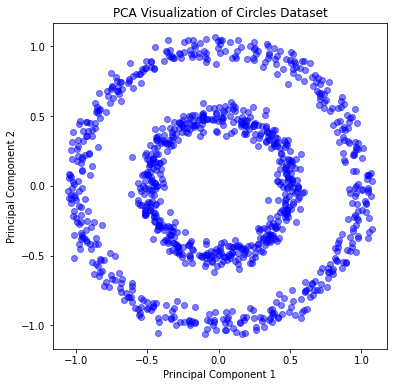

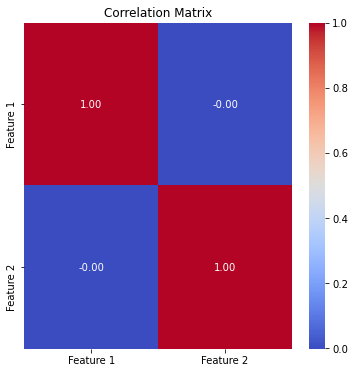

Explained Variance Ratio by PCA Components: [0.50267638 0.49732362]
Total Variance Explained by PCA Components: 1.0


In [16]:
# Perform PCA for dimensionality reduction.
pca = PCA(n_components=2)
circles_pca = pca.fit_transform(circles)

# Plotting the PCA-reduced dataset.
plt.figure(figsize=(6, 6))
plt.scatter(circles_pca[:, 0], circles_pca[:, 1], c='blue', alpha=0.5)
plt.title("PCA Visualization of Circles Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Correlation matrix.
corr_matrix = np.corrcoef(circles.T)
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=['Feature 1', 'Feature 2'], yticklabels=['Feature 1', 'Feature 2'])
plt.title("Correlation Matrix")
plt.show()

# Analysis
print("Explained Variance Ratio by PCA Components:", pca.explained_variance_ratio_)
print("Total Variance Explained by PCA Components:", np.sum(pca.explained_variance_ratio_))



After performing PCA for dimensionality reduction, we visualize the dataset in two dimensions using the principal components. Additionally, we compute and display the correlation matrix to understand the relationships between the original features.

The explained variance ratio by the PCA components indicates the proportion of variance explained by each principal component. The total variance explained by PCA components provides insights into the amount of information retained after dimensionality reduction

### K-Means Clustering
We'll apply the K-Means clustering algorithm to the Circles dataset and visualize the resulting clusters.

/Users/janaalghamdi/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


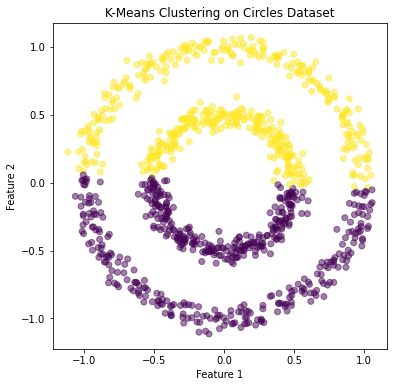

In [13]:
# Applying K-Means clustering.
kmeans = KMeans(n_clusters=2, random_state=42)
circles_kmeans_labels = kmeans.fit_predict(circles)

# Plotting the K-Means clusters.
plt.figure(figsize=(6, 6))
plt.scatter(circles[:, 0], circles[:, 1], c=circles_kmeans_labels, cmap='viridis', alpha=0.5)
plt.title("K-Means Clustering on Circles Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


### DBSCAN Clustering
Next, we'll apply the DBSCAN clustering algorithm to the Circles dataset and visualize the resulting clusters.

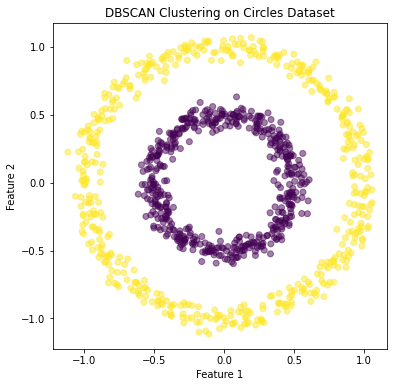

In [14]:
# Applying DBSCAN clustering.
dbscan = DBSCAN(eps=0.15, min_samples=5)
circles_dbscan_labels = dbscan.fit_predict(circles)

# Plotting the DBSCAN clusters.
plt.figure(figsize=(6, 6))
plt.scatter(circles[:, 0], circles[:, 1], c=circles_dbscan_labels, cmap='viridis', alpha=0.5)
plt.title("DBSCAN Clustering on Circles Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


### Conclusion
Comparing the results of K-Means and DBSCAN clustering algorithms on the Circles dataset, we observe that:

- K-Means: Forms clusters based on centroids and struggles to capture the circular structure of the dataset, resulting in misclassifications.  
- DBSCAN: Identifies clusters based on density and effectively captures the circular structure of the dataset, forming distinct clusters around each circle.  

In this scenario, DBSCAN outperforms K-Means by successfully clustering the non-linearly separable Circles dataset.